## DECISION TREES !!!

<div class='alert alert-info'>
Objective
<div>


Use decision tree model to determine the factors that predict whether a mushroom is poisonous or edible

<div class='alert alert-info'>
            Content
            </div>
            
#### 1. Data Preprocessing

#### 2. Dataset Descriptions 
    
#### 3. Splitting the dataset into train and test sets 
    
#### 4. Instantiate Decision Tree Classifier and Fit model

#### 5. Making predictions and evaluating performance¶

#### 6. Tree Pruning

#### 7. References

<div class='alert alert-info'>
    Well, Let the fun begin !!
    </div>

### 1. Data Preprocessing
    - Inspecting Data frame
    - Rename columns
    - Replace value of columns
    - Handling Nan values

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import bs4
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import urlopen


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv('../Data/agaricus-lepiota.data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
# Getting column and row names
url = "https://umuzi-org.github.io/tech-department/projects/data-science-specific/decision-trees/"
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

# Getting specific text from the soup object
additional_info, column_names, details = [], [], []

for text in soup.find_all('td'):
    additional_info.append(text.get_text())
    
for index, value in enumerate(additional_info[8:]):
    if index == 0:
        column_names.append(value)
    elif index % 2 == 0:
        column_names.append(value)
    else:
        details.append(value)
        
# renaming columns heading
rename_columns = {df.columns[i]: column_names[i] for i in range(len(df.columns))}

df = df.rename(columns=rename_columns)

df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
# Rename row values
def string_to_dictionary(element):
    key, value, split_str = [], [], []
    
    # first split
    output = element.split("=")  
    
    second_split = [split_str.append(v.split(" ")) for i, v in enumerate(output)]
        
    # flatten the list        
    output_list = list(np.concatenate(split_str))

    iterate_output_list = [value.append(v) if i % 2 == 0 else key.append(v) for i, v in enumerate(output_list)]
       
    # removing common character
    for i,v in enumerate(key):
        key[i] = key[i].replace(",","")
        
    # create and return final dictionary  
    return {key[i]: value[i] for i in range(len(key))}

# For each column values, iterate and rename values
increment = 0
for (column_name, column_data) in df.iteritems():
    df[column_name] = df[column_name].map(string_to_dictionary(details[increment]))
    increment += 1
    
#----------------------
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
classes                     8123 non-null object
cap-shape                   8123 non-null object
cap-surface                 8123 non-null object
cap-color                   8123 non-null object
bruises?                    8123 non-null object
odor                        8123 non-null object
gill-attachment             8123 non-null object
gill-spacing                8123 non-null object
gill-size                   8123 non-null object
gill-color                  8123 non-null object
stalk-shape                 8123 non-null object
stalk-root                  8123 non-null object
stalk-surface-above-ring    8123 non-null object
stalk-surface-below-ring    8123 non-null object
stalk-color-above-ring      8123 non-null object
stalk-color-below-ring      8123 non-null object
veil-type                   8123 non-null object
veil-color                  8123 non-null object
ring-number

### Dataset Overview

#### Dataset statistics

- Number of variables----- 23
- Number of observations---- 8124
- Duplicate rows---- 0
- Total size in memory---- 11.2 MiB
- Average record size in memory---- 1.4 KiB
- dtypes---- object(23)

### Handling Nan values

In [6]:
# Iterate over each column of df
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])

In [7]:
print('There a total of {} null values in the dataframe'.format(df.isnull().sum().sum()))

There a total of 0 null values in the dataframe


### 2. Dataset Descriptions 
    - Max values per column
    - Min values per column

In [8]:
df.max()

classes                     poisonous
cap-shape                      sunken
cap-surface                    smooth
cap-color                      yellow
bruises?                           no
odor                            spicy
gill-attachment                  free
gill-spacing                  crowded
gill-size                      narrow
gill-color                     yellow
stalk-shape                  tapering
stalk-root                     rooted
stalk-surface-above-ring       smooth
stalk-surface-below-ring       smooth
stalk-color-above-ring         yellow
stalk-color-below-ring         yellow
veil-type                     partial
veil-color                     yellow
ring-number                       two
ring-type                     pendant
spore-print-color              yellow
population                   solitary
habitat                         woods
dtype: object

In [9]:
print('{0} mushrooms seem to often be {1}, {2} in color, and found in {3}.'.format(df['classes'].max(),df['cap-shape'].max(),df['cap-color'].max(),df['habitat'].max()))

poisonous mushrooms seem to often be sunken, yellow in color, and found in woods.


In [10]:
df.min()

classes                         edible
cap-shape                         bell
cap-surface                    fibrous
cap-color                        brown
bruises?                       bruises
odor                            almond
gill-attachment               attached
gill-spacing                     close
gill-size                        broad
gill-color                       black
stalk-shape                  enlarging
stalk-root                     bulbous
stalk-surface-above-ring       fibrous
stalk-surface-below-ring       fibrous
stalk-color-above-ring           brown
stalk-color-below-ring           brown
veil-type                      partial
veil-color                       brown
ring-number                       none
ring-type                   evanescent
spore-print-color                black
population                    abundant
habitat                        grasses
dtype: object

In [11]:
print('{0} mushrooms seem to often be {1} shaped, {2} in color, and found in {3}.'.format(df['classes'].min(),df['cap-shape'].min(),df['cap-color'].min(),df['habitat'].min()))

edible mushrooms seem to often be bell shaped, brown in color, and found in grasses.


### 3. Splitting the dataset into train and test sets

In [12]:
# Segregate features and labels into separate variables
y = df['classes'].replace(to_replace = ['poisonous','edible'], value =[0,1])
X = df.drop('classes', axis = 1)

#labelencode
X = X.apply(LabelEncoder().fit_transform)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 13)

### 4. Instantiate Decision Tree Classifier and Fit model
    - Fit tree model
    - Prediction

In [13]:
# Instantiate a DecisionTree classifier with default parameter values
decision_tree = DecisionTreeClassifier()

# Fit decision_tree to the train set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
#Prediction
y_pred = decision_tree.predict(X_test)

### 5. Making predictions and evaluating performance¶
    - Confusion matrix 
    - Classification report

In [15]:
# Print the confusion matrix of the decision_tree model
print('Confusion Matrix \n {}'.format(confusion_matrix(y_test, y_pred)))

# Print the Classification Report of the decision_tree model
print('\nClassification Report \n {}'.format(classification_report(y_test, y_pred)))

Confusion Matrix 
 [[782   0]
 [  0 843]]

Classification Report 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       782
          1       1.00      1.00      1.00       843

avg / total       1.00      1.00      1.00      1625



- The model is 100% accurate. 
- This is not satisfying as a perfect accuracy score indicates issues
- I will select features according to their importance than prune the model, this will improve the performance of the model

### 6. Tree Pruning

    - Select Tree model
    - Feature Importance
    - Split dataset into train and test sets
    - Fit model
    - Prediction
    - Classification report
    - Receiver Operating Characteristic (ROC) Curve

In [16]:
model = SelectFromModel(decision_tree, prefit=True)
X_new = model.transform(X)

In [17]:
# Selecting important features
dict = {'feature': X.columns, 'feature_importance':decision_tree.feature_importances_}
new_df = pd.DataFrame(dict)
new_df.sort_values('feature_importance',axis=0,ascending=False,inplace=True)
new_df
features = [x for x in new_df['feature'].head(X_new.shape[1])]
print(f"The following are the most important features in the model:\n{features}")

The following are the most important features in the model:
['spore-print-color', 'ring-number', 'gill-size']


In [18]:
# Segregate features and labels into separate variables 
x = df[features]
x = x.apply(LabelEncoder().fit_transform)

y = y

# Split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

In [19]:
classic = DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='random',random_state=0)

classic.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='random')

In [20]:
y_predict = classic.predict(x_test)

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       771
          1       1.00      0.95      0.97       854

avg / total       0.97      0.97      0.97      1625



    Selecting important features using feature_importances and Prunning the tree model    has improved the performance of the classic model by 3%

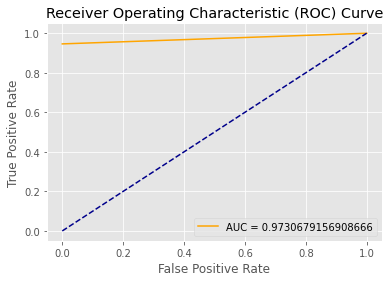

In [21]:
roc_auc = roc_auc_score(y_test,y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.plot(fpr, tpr, color='orange', label= f'AUC = {roc_auc}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 7. References

- https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
- https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93
- https://www.twilio.com/blog/web-scraping-and-parsing-html-in-python-with-beautiful-soup